In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import joblib

# Detect Ransomware, Phishing, and Trojan.

In [11]:
# Read the CSV file and drop unnecessary columns
df1 = pd.read_csv('ransomware.csv').drop(columns=['FileName', 'md5Hash'])

# Drop duplicates
df1 = df1.drop_duplicates(keep='last')

# Transform categorical columns to numerical categorical code format to allow algorithms to process the data more efficiently.
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve","MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df1[col] = df1[col].astype('category').cat.codes

# Save the cleaned dataset to a new CSV file
df1.to_csv("df_clear.csv", index=False)

In [12]:
df1 = pd.read_csv("df_clear.csv")
df1

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
1,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
2,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1
3,4,11,319776,10,10,374944,9208,312608,14,10,6,9,16736,2072,0,1
4,4,11,197888,10,10,229024,112,187208,14,10,6,9,16736,1328,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,1,0,0,1,4,0,0,4096,6,0,2,12,0,23504,0,0
32252,1,0,0,7,10,0,0,0,7,0,6,12,0,15704,0,0
32253,1,0,0,0,4,0,0,404908,2,50,10,12,0,2364,0,0
32254,1,0,0,0,4,14448,70,4096,8,0,3,12,0,130296,0,0


In [13]:
# Prepare data for model training
x1, y1 = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=0)

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

# Create and train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x1_train, y1_train)

# Evaluate the model
accuracy = rf.score(x1_test, y1_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.00%


In [14]:
# Perform cross-validation
scores = cross_val_score(rf, x1, y1, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.99  0.96  0.935 0.95  0.96 ]
Mean Score: 0.959


Confusion Matrix:
[[95  3]
 [ 3 99]]

Classification Report:
True Positives: 99
False Positives: 3
True Negatives: 95
False Negatives: 3


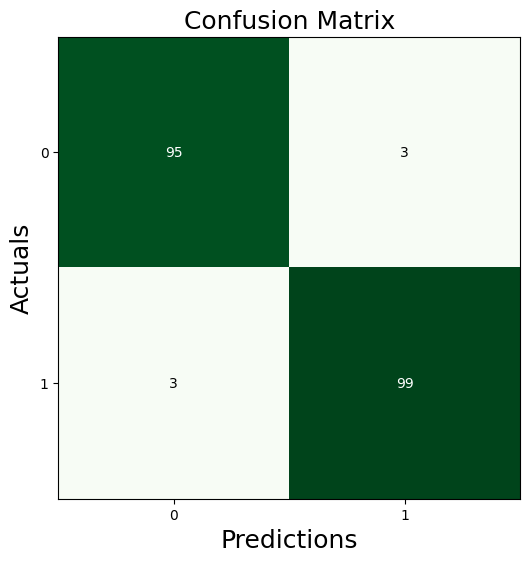

In [20]:
# Make predictions
y_pred = rf.predict(x1_test)

# Print confusion matrix
cm = confusion_matrix(y1_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = cm.ravel()

# Print classification report
print("\nClassification Report:")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

# Plot confusion matrix with labels
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [9]:
# Load new data for prediction
x1_new = [[1, 1, 0, 0, 6, 2, 0, 8192, 8, 0, 3, 1048576, 34112, 672,0],[3, 0, 0, 0, 6, 2, 0, 8192, 8,	0, 0, 0, 0, 672,0 ]]

# Actual classes of the new data
y_actual = [1, 1]  

# Use the model to predict the classes of the new data
y_pred = rf.predict(x1_new)

# Print the predicted classes of the new data
print("Predicted classes:", y_pred)

# Compare predicted classes with actual classes
for i in range(len(y_pred)):
    print("Predicted class:", y_pred[i], " Actual class:", y_actual[i])

Predicted classes: [1 1]
Predicted class: 1  Actual class: 1
Predicted class: 1  Actual class: 1


In [22]:
# Load the dataset
df2 = pd.read_csv("phishing_set.csv")
df2

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11612
           1       0.95      0.96      0.96      6118

    accuracy                           0.97     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730


Classification Report:
True Positives: 5870
False Positives: 287
True Negatives: 11325
False Negatives: 248


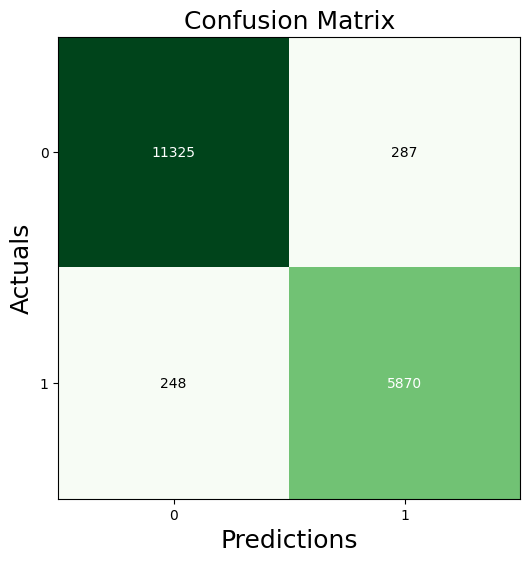

In [25]:
x2 = df2.drop(['phishing'], axis=1)  
y2 = df2['phishing']  

# Split the dataset into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(x2_train, y2_train)

# Make predictions
y2_pred = model.predict(x2_test)

# Print classification report
print(classification_report(y2_test, y2_pred))

cm2=confusion_matrix(y2_test, y2_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = cm2.ravel()

# Print classification report
print("\nClassification Report:")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

fig, ax = plot_confusion_matrix(conf_mat=cm2 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Number of legitimate website instances (labeled as 0): 58,000
# Number of phishing website instances (labeled as 1): 30,647

In [12]:
# Load new data for prediction
x2_new = [[3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0], 
          [2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0]]

# Actual classes of the new data
y2_actual = [1, 0]  

# Use the model to predict the classes of the new data
y2_pred = model.predict(x2_new)

# Print the predicted classes of the new data
print("Predicted classes:", y2_pred)

# Compare predicted classes with actual classes
for i in range(len(y_pred)):
    print("Predicted class:", y2_pred[i], " Actual class:", y2_actual[i])

# 1 - Legitimate    0 - Phishing

Predicted classes: [1 0]
Predicted class: 1  Actual class: 1
Predicted class: 0  Actual class: 0


In [30]:
# Load the dataset
df3 = pd.read_csv("Trojan_Detection.csv")

# Remove leading underscores and replace special characters with underscores in column names
df3.columns = df3.columns.str.lstrip('_').str.replace('[^a-zA-Z0-9]', '_', regex=True)

# Check unique values in the 'Class' column to understand the current classes
print(df3['Class'].unique())

# Transform 'Trojan' class into 0 and 'Benign' class into 1
df3['Class'] = df3['Class'].map({'Trojan': 0, 'Benign': 1})

# Check unique values in the 'Class' column after transformation
print(df3['Class'].unique())

# 0 - 'Trojan'  1 - 'Benign'


['Trojan' 'Benign']
[0 1]


In [31]:
# Check the column names to verify spelling and case
print(df3.columns)

Index(['Unnamed__0', 'Flow_ID', '_Source_IP', '_Source_Port',
       '_Destination_IP', '_Destination_Port', '_Protocol', '_Timestamp',
       '_Flow_Duration', '_Total_Fwd_Packets', '_Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', '_Total_Length_of_Bwd_Packets',
       '_Fwd_Packet_Length_Max', '_Fwd_Packet_Length_Min',
       '_Fwd_Packet_Length_Mean', '_Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', '_Bwd_Packet_Length_Min',
       '_Bwd_Packet_Length_Mean', '_Bwd_Packet_Length_Std', 'Flow_Bytes_s',
       '_Flow_Packets_s', '_Flow_IAT_Mean', '_Flow_IAT_Std', '_Flow_IAT_Max',
       '_Flow_IAT_Min', 'Fwd_IAT_Total', '_Fwd_IAT_Mean', '_Fwd_IAT_Std',
       '_Fwd_IAT_Max', '_Fwd_IAT_Min', 'Bwd_IAT_Total', '_Bwd_IAT_Mean',
       '_Bwd_IAT_Std', '_Bwd_IAT_Max', '_Bwd_IAT_Min', 'Fwd_PSH_Flags',
       '_Bwd_PSH_Flags', '_Fwd_URG_Flags', '_Bwd_URG_Flags',
       '_Fwd_Header_Length', '_Bwd_Header_Length', 'Fwd_Packets_s',
       '_Bwd_Packets_s', '_Min_Packet_Len

In [32]:
# Remove columns with special characters from feature names
columns_to_drop = ['Class', 'Flow_ID', '_Source_IP', '_Destination_IP', '_Timestamp']
x3 = df3.drop(columns=columns_to_drop)
y3 = df3['Class']

# Split the dataset into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Define the LightGBM classifier
clf = lgb.LGBMClassifier()

# Train the classifier on the training data
clf.fit(x3_train, y3_train)

[LightGBM] [Info] Number of positive: 69362, number of negative: 72623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14828
[LightGBM] [Info] Number of data points in the train set: 141985, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488516 -> initscore=-0.045943
[LightGBM] [Info] Start training from score -0.045943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier()

Accuracy: 0.9999154858157028
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18060
           1       1.00      1.00      1.00     17437

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497


Classification Report:
True Positives: 17434
False Positives: 0
True Negatives: 18060
False Negatives: 3


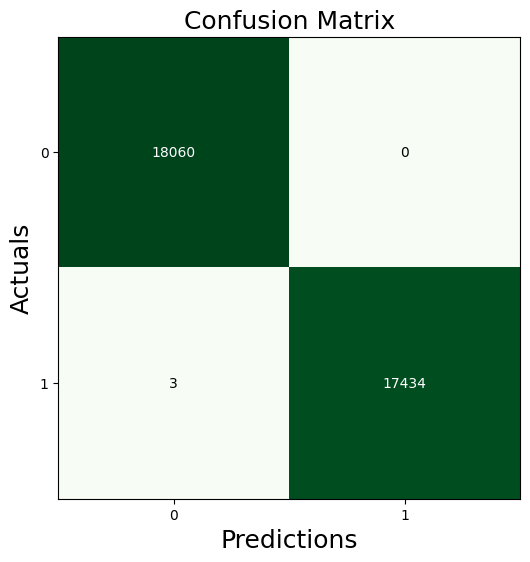

In [33]:

# Evaluate the model's performance on the testing data
accuracy = clf.score(x3_test, y3_test)
print("Accuracy:", accuracy)

# Generate classification report
y3_pred = clf.predict(x3_test)
print("Classification Report:")
print(classification_report(y3_test, y3_pred))

cm3=confusion_matrix(y3_test, y3_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = cm3.ravel()

# Print classification report
print("\nClassification Report:")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")

fig, ax = plot_confusion_matrix(conf_mat=cm3 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
# Load new data for prediction
x3_new = [[73217, 49975, 80, 6, 10743584,4,4,372.0,672.0,372.0,0.0,93.0,186.0,672.0,0.0,168.0,336.0,97.17427629364651,0.7446304696831151,1534797.714285714,3734695.2985207834,9995178.0,500.0,748406.0,249468.66666666663,215629.51130430485,376606.0,500.0,10375411.0,3458470.333333333,5668285.795797027,10000076.0,557.0,0,0,0,0,100,92,0.3723152348415575,0.3723152348415575,0.0,672.0,116.0,242.09089202198416,58607.99999999999,0,0,0,1,0,0,0,0,1.0,130.5,93.0,168.0,100,0,0,0,0,0,0,4,372,4,672,65535,511,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
          [96676, 37749, 53, 17, 1023244,1,1,30.0,179.0,30.0,30.0,30.0,0.0,179.0,179.0,179.0,0.0,204.2523581863172,1.954568020921696,1023244.0,0.0,1023244.0,1023244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,32,20,0.977284010460848,0.977284010460848,30.0,179.0,79.66666666666666,86.02519010925424,7400.333333333333,0,0,0,0,0,0,0,0,1.0,119.5,30.0,179.0,32,0,0,0,0,0,0,1,30,1,179,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]

# Actual classes of the new data
y3_actual = [0, 1]  

# Use the model to predict the classes of the new data
y3_pred = clf.predict(x3_new)

# Print the predicted classes of the new data
print("Predicted classes:", y3_pred)

# Compare predicted classes with actual classes
for i in range(len(y_pred)):
    print("Predicted class:", y3_pred[i], " Actual class:", y3_actual[i])

# 0 - 'Trojan'  1 - 'Benign'

Predicted classes: [0 1]
Predicted class: 0  Actual class: 0
Predicted class: 1  Actual class: 1
